<a href="https://colab.research.google.com/github/RobertSparadrap/neronal_network/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [2]:
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

In [4]:
trainset = torchvision.datasets.CIFAR10(root="./datasets", download=True, train=True, transform=transforms)
testset = torchvision.datasets.CIFAR10(root="./datasets", download=True, train=False, transform=transforms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified


In [5]:
class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [13]:
def show_images(images, labels, rows=6, cols=10):
  fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
  plt.subplots_adjust(bottom=0)
  for i in range(cols*rows):
    ridx = i // cols
    cidx = i % cols
    ax = axes[ridx, cidx]
    ax.axis("off")
    img = images[i] / 2 + 0.5
    img = img.permute(1, 2, 0)
    ax.imshow(img.numpy())
    label = class_names[labels[i]]
    ax.set_title("{}" .format(label))
  plt.show()
  return fig

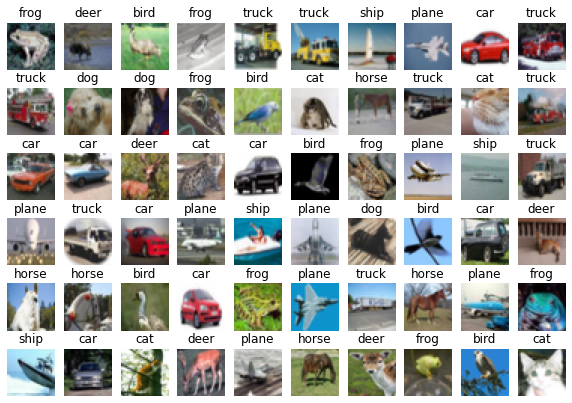

In [14]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
trainiter = iter(trainloader)
images, labels = next(trainiter)
fig = show_images(images, labels)

In [17]:
import torch.nn as nn
import torch.nn.functional as F

class ImageNet(nn.Module):
  def __init__(self):
    super(ImageNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # 3x32x32 -> 6x28x28
    self.act1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(2, 2) # 6x28x28 -> 6x14x14

    self.conv2 = nn.Conv2d(6, 16, 5) # 6x14x14 -> 16x10x10
    self.act2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(2, 2) # 16x10x10 -> 16x5x5
    self.layer1 = nn.Linear(16*5*5, 120)
    self.act3 = nn.ReLU()
    self.layer2 = nn.Linear(120, 84)
    self.act4 = nn.ReLU()
    self.out_layer = nn.Linear(84, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.act2(x)
    x = self.pool2(x)
    x = x.view(-1, 16*5*5)
    x = self.layer1(x)
    x = self.act3(x)
    x = self.layer2(x)
    x = self.act4(x)
    x = self.out_layer(x)
    return x


tensor([-0.0446, -0.0638,  0.0796,  0.0007, -0.0448,  0.1235, -0.0801, -0.0423,
         0.0630, -0.0570], grad_fn=<SelectBackward0>)
tensor(5)


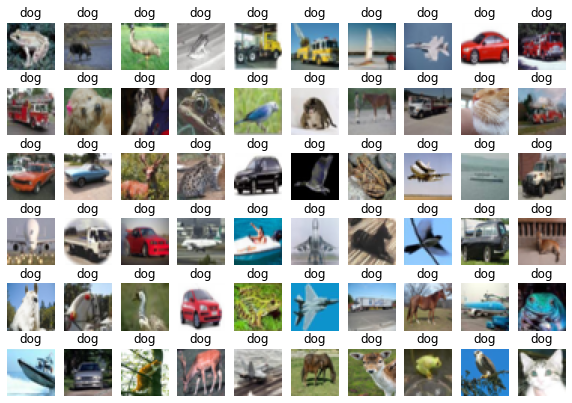

In [21]:
model = ImageNet()
preds = model(images)
print(preds[0])
print(preds[0].argmax())
preds = [pred.argmax() for pred in preds]
fig = show_images(images, preds)

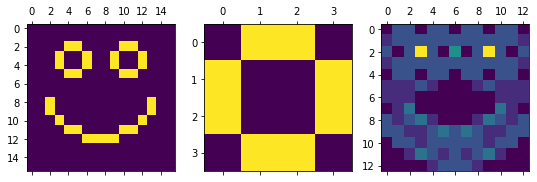

In [22]:
img = torch.Tensor([[[
            [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
            [ 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
            [ 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
            [ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
            [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
            [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
            [ 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
            [ 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
            [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]]])

conv = nn.Conv2d(1,1,4,1, bias=False)
conv.weight = nn.Parameter(torch.Tensor([[[
    [ 0, 1, 1, 0],
    [ 1, 0, 0, 1],
    [ 1, 0, 0, 1],
    [ 0, 1, 1, 0]
]]]))

conv_img = conv(img)

## vizualize
fig, (a,b,c) = plt.subplots(1,3, figsize=(9,3))
a.matshow(img[0][0])
b.matshow(conv.weight.detach().numpy()[0][0])
c.matshow(conv_img.detach().numpy()[0][0])

In [25]:
from torch import optim

def train_model(model, trainloader, epochs=15, lr=0.0035, momentum=0.7):
  sgd = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
  cel = nn.CrossEntropyLoss()
  losses = []
  for epoch in range(epochs):
    _loss = 0
    for images, labels in trainloader:
      sgd.zero_grad()
      preds = model(images)
      loss = cel(preds, labels)
      loss.backward()
      sgd.step()
      _loss += loss.item()
    avg_loss = _loss / len(trainloader)
    losses.append(avg_loss)
    print(f"Epoch {epoch} - training loss: {avg_loss}")
  return model, losses

In [26]:
model = ImageNet()
model, losses = train_model(model, trainloader)

Epoch 0 - training loss: 2.280502130918186
Epoch 1 - training loss: 2.002051938067922
Epoch 2 - training loss: 1.7953307590521206
Epoch 3 - training loss: 1.6205416408646138
Epoch 4 - training loss: 1.5071603864660044
Epoch 5 - training loss: 1.4409746178580671
Epoch 6 - training loss: 1.3887250217635307
Epoch 7 - training loss: 1.3418992178519364
Epoch 8 - training loss: 1.298806384091487
Epoch 9 - training loss: 1.2592254278757382
Epoch 10 - training loss: 1.2240978426030835
Epoch 11 - training loss: 1.1886093791031167
Epoch 12 - training loss: 1.158828616142273
Epoch 13 - training loss: 1.1296902992536344
Epoch 14 - training loss: 1.102819028565341


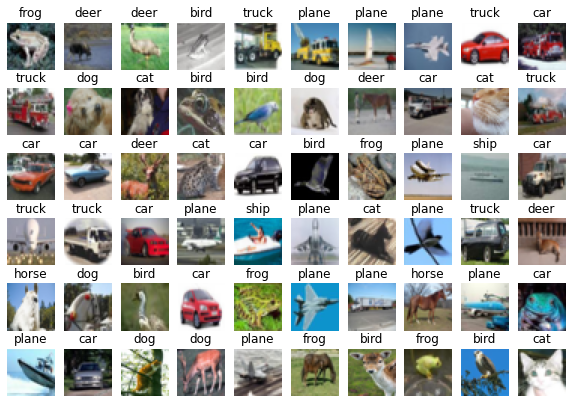

In [27]:
preds = model(images)
preds = [pred.argmax() for pred in preds]
fig = show_images(images, preds)              

In [32]:
pred = model(images[9].unsqueeze(dim=0))
class_names[pred.argmax()]

'car'

In [33]:
model, losses = train_model(model, trainloader, lr=0.01, epochs=50, momentum=0.5)

Epoch 0 - training loss: 1.1150060759480958
Epoch 1 - training loss: 1.0756966946527475
Epoch 2 - training loss: 1.0363473240524301
Epoch 3 - training loss: 1.0055349812940564
Epoch 4 - training loss: 0.9755798963939443
Epoch 5 - training loss: 0.9487046332615415
Epoch 6 - training loss: 0.9214874984663161
Epoch 7 - training loss: 0.9007505890353561
Epoch 8 - training loss: 0.8755227907386887
Epoch 9 - training loss: 0.8548475250106333
Epoch 10 - training loss: 0.832560963680982
Epoch 11 - training loss: 0.816700088017432
Epoch 12 - training loss: 0.7948098766529347
Epoch 13 - training loss: 0.775758508640482
Epoch 14 - training loss: 0.7573296815309378
Epoch 15 - training loss: 0.738808258796287
Epoch 16 - training loss: 0.721441518810704
Epoch 17 - training loss: 0.7050965535442543
Epoch 18 - training loss: 0.6912140907038509
Epoch 19 - training loss: 0.6753248363123525
Epoch 20 - training loss: 0.6583051320232088
Epoch 21 - training loss: 0.6457919617519354
Epoch 22 - training loss:

In [34]:
import time
import os

timestamp = time.strftime("%Y%m%d-%H%M%S")
file_name = f"conv_{timestamp}.bin"
file_path = os.path.join("models", file_name)
torch.save(model, file_path)

RuntimeError: ignored

In [38]:
def plot_loss(losses):
  fig = plt.figure()
  plt.plot(losses, color="g")
  plt.ylim(bottom=0)
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.show()
  return fig

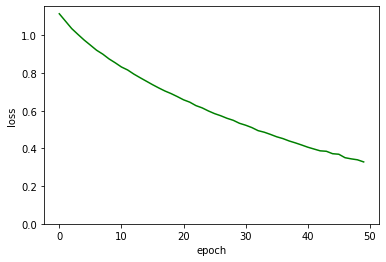

In [39]:
fig = plot_loss(losses)

In [35]:
def validate_model(model, testset):
  class_correct, class_count = [0]*10, [0]*10
  wrong_predictions = []
  for image, label in testset:
    with torch.no_grad():
      pred = model(image.unsqueeze(0))[0]
    pred_label = pred.argmax()
    if pred_label == label:
      class_correct[label] += 1
    else:
      wrong_predictions.append((image, label, pred_label))
    class_count[label] += 1
  class_accruacy = [0]*10
  for cls in range(10):
    accruacy = class_correct[cls] / class_count[cls]
    class_accruacy[cls] = accruacy
  total_accruacy = sum(class_correct) / sum(class_count)
  return class_count, class_accruacy, total_accruacy, wrong_predictions

In [36]:
class_count, class_accruacy, total_accruacy, wrond_preds = validate_model(model, testset)
print(f"Number of images tested: {sum(class_count)}")
print(f"Model accruacy: {total_accruacy: .2%}")
print("=====Classes Accruacy=====")
for cls in range(10):
  print(f"Accruacy for {class_names[cls]}: {class_accruacy[cls]: .2%}")

Number of images tested: 10000
Model accruacy:  62.60%
=====Classes Accruacy=====
Accruacy for plane:  68.30%
Accruacy for car:  73.60%
Accruacy for bird:  57.60%
Accruacy for cat:  43.20%
Accruacy for deer:  54.50%
Accruacy for dog:  52.20%
Accruacy for frog:  67.50%
Accruacy for horse:  63.30%
Accruacy for ship:  77.50%
Accruacy for truck:  68.30%


In [40]:
def show_prediction_proba(img):
  pred = model(img.unsqueeze(0)).squeeze()
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  img = img.permute(1, 2, 0)
  img = img.numpy() / 2 + 0.5
  ax1.imshow(img)
  pred = F.softmax(pred, 0)
  ax2.bar(class_names, pred.detach().numpy())
  plt.xticks(rotation=45)
  ax2.set_title("probability distribution")
  plt.show()
  return fig

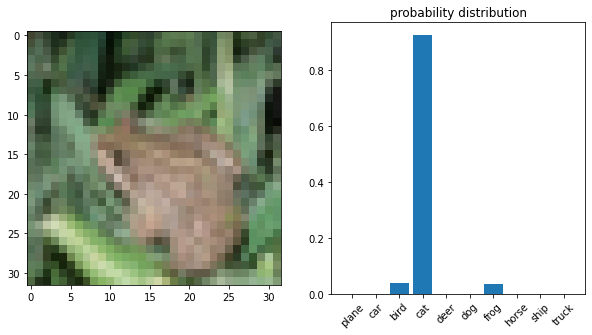

In [41]:
fig = show_prediction_proba(wrond_preds[0][0])

In [42]:
def show_conv(conv, rows, cols):
  fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
  for idx in range(rows*cols):
    ridx = idx // cols
    cidx = idx % cols
    ax = axes[ridx, cidx]
    ax.axis("off")
    ax.matshow(conv[idx], cmap="gray")
  plt.show()
  return fig

In [43]:
model.conv1.weight.data.numpy().shape

(6, 3, 5, 5)

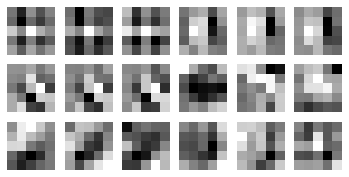

In [44]:
conv1 = model.conv1.weight.data.numpy().reshape((-1, 5, 5))
fig1 = show_conv(conv1, 3, 6)

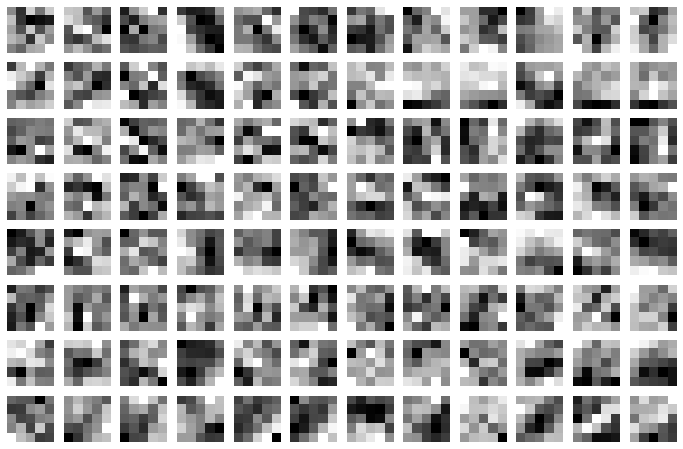

In [45]:
conv2 = model.conv2.weight.data.numpy().reshape((-1, 5, 5))
fig2 = show_conv(conv2, 8, 12)